In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

     |████████████████████████████████| 285 kB 8.2 MB/s eta 0:00:01


In [27]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', sep=',', header=None)

In [28]:
#colunas da base
preditores = ['id','diagnostic','radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
 'smoothness_mean', 'compactness_mean', 'concavity_mean',
 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
 'radius_se', 'texture_se', 'perimeter_se', 'area_se',
 'smoothness_se', 'compactness_se', 'concavity_se',
 'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
 'smoothness_worst', 'compactness_worst', 'concavity_worst',
 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']
data.columns = preditores

data

,id,diagnostic,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [29]:
data['diagnostic'].replace(['B','M'],[0,1],inplace=True)
data.set_index(['id'], inplace = True)
data

,diagnostic,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [30]:
Aux = data['diagnostic'].value_counts()
print('Malignant :', Aux[1])
print('Benign    :', Aux[0])

Malignant : 212
Benign    : 357


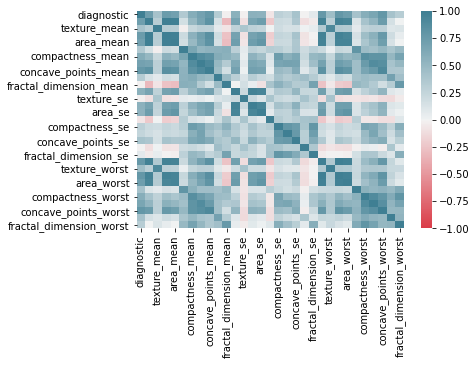

In [31]:
heat_map = sns.heatmap(data.corr(),vmax=1, vmin=-1, center=0,
            cmap=sns.diverging_palette(10, 220, as_cmap=True))
plt.show()

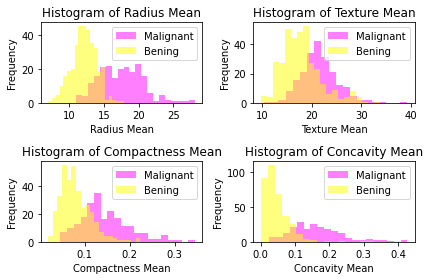

In [32]:
plt.subplot(2,2,1)
m = plt.hist(data[data["diagnostic"] == 1].radius_mean,bins=20,fc = (1,0,1,0.5),label = "Malignant")
b = plt.hist(data[data["diagnostic"] == 0].radius_mean,bins=20,fc = (1,1,0,0.5),label = "Bening")
plt.legend()
plt.xlabel("Radius Mean")
plt.ylabel("Frequency")
plt.title("Histogram of Radius Mean")

plt.subplot(2,2,2)
m = plt.hist(data[data["diagnostic"] == 1].texture_mean,bins=20,fc = (1,0,1,0.5),label = "Malignant")
b = plt.hist(data[data["diagnostic"] == 0].texture_mean,bins=20,fc = (1,1,0,0.5),label = "Bening")
plt.legend()
plt.xlabel("Texture Mean")
plt.ylabel("Frequency")
plt.title("Histogram of Texture Mean")

plt.subplot(2,2,3)
m = plt.hist(data[data["diagnostic"] == 1].compactness_mean,bins=20,fc = (1,0,1,0.5),label = "Malignant")
b = plt.hist(data[data["diagnostic"] == 0].compactness_mean,bins=20,fc = (1,1,0,0.5),label = "Bening")
plt.legend()
plt.xlabel("Compactness Mean")
plt.ylabel("Frequency")
plt.title("Histogram of Compactness Mean")

plt.subplot(2,2,4)
m = plt.hist(data[data["diagnostic"] == 1].concavity_mean,bins=20,fc = (1,0,1,0.5),label = "Malignant")
b = plt.hist(data[data["diagnostic"] == 0].concavity_mean,bins=20,fc = (1,1,0,0.5),label = "Bening")
plt.legend()
plt.xlabel("Concavity Mean")
plt.ylabel("Frequency")
plt.title("Histogram of Concavity Mean")
plt.tight_layout()
plt.show()

In [33]:
from sklearn.preprocessing import LabelEncoder,StandardScaler #normalização

#y é a classe e X as variáveis dependentes
X = data.drop(['diagnostic'], axis=1).values
classe = data['diagnostic'].values
labelencoder_classe = LabelEncoder() #converte para zeros e uns
y = labelencoder_classe.fit_transform(classe)

In [34]:
#normalização dos dados
scaler = StandardScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.373633e-16,6.868164e-17,-1.248757e-16,-2.185325e-16,1.748260e-16,1.998011e-16,3.746271e-17,-3.746271e-17,1.873136e-16,4.526744e-16,...,-8.241796e-16,1.248757e-17,-3.746271e-16,0.000000,-2.372638e-16,-3.371644e-16,7.492542e-17,2.247763e-16,2.747265e-16,2.122887e-16
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-0.642136,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-0.341181,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,0.357589,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


In [35]:
#divisão entre treino (80%) e teste (20%)
from sklearn.model_selection import train_test_split
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [36]:
#conjunto de hiperparâmetros a ser utilizado
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 20, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(1, 15, num = 5)]
max_depth.append(None)
min_samples_split = [2, 3, 4, 5]
min_samples_leaf = [1, 2, 3, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [37]:
random_grid2 = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 
'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [38]:
from sklearn.model_selection import RandomizedSearchCV
#usando um método de cross-validation com 5 partes. Número de iteraçãos =100
RandomizedSearchCV(cv=20, estimator=RandomForestClassifier(), param_distributions=random_grid, n_iter=100, verbose=2, n_jobs=-1)

RandomizedSearchCV(cv=20, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 4, 8, 11, 15, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [1, 3, 5, 7, 9, 11, 13,
                                                         15, 17, 20]},
                   verbose=2)

In [41]:
from sklearn.svm import SVC

RandomizedSearchCV(SVC(), random_grid2, cv=5)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'gamma': [0.001, 0.01, 0.1, 1, 10,
                                                  100]})

In [46]:
clf_RS = RandomizedSearchCV(RandomForestClassifier(), random_grid, random_state=130).fit(X,y)

In [47]:
#exibindo e aplicando os melhores parâmetros
params_RS = clf_RS.best_params_
clf1 = RandomForestClassifier(**params_RS)

In [48]:
clf1.fit(X_treinamento,y_treinamento)

RandomForestClassifier(bootstrap=False, max_depth=11, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=4,
                       n_estimators=20)

In [49]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

previsao = clf1.predict(X_teste)

print('Acuracia : ',accuracy_score(y_teste, previsao))
print('Precisao : ',precision_score(y_teste, previsao, average='macro'))

Acuracia :  0.956140350877193
Precisao :  0.9553571428571428


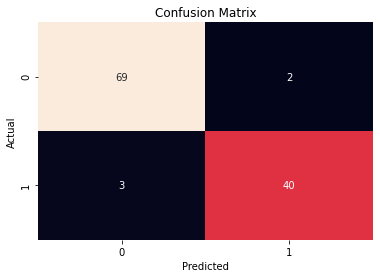

In [51]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

previsao = clf1.predict(X_teste)

conf_mat = confusion_matrix(y_teste, previsao)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [52]:
from sklearn.metrics import recall_score #recall

recall = recall_score(y_teste, previsao)
print('Recall: ',recall)

Recall:  0.9302325581395349


In [53]:
from sklearn.metrics import f1_score #f1-score

f1 = f1_score(y_teste, previsao)
print('F1-Score: %f' % f1)

F1-Score: 0.941176


In [54]:
from sklearn.metrics import classification_report # metricas de validação

print(classification_report(y_teste, previsao))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



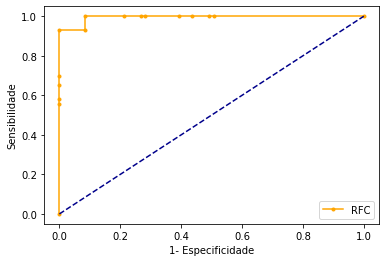

AUC-ROC : 0.9510317720275139


In [56]:
from sklearn.metrics import roc_curve #curva roc
from sklearn.metrics import roc_auc_score #area sob curva roc

# calculate AUC
auc = roc_auc_score(y_teste, previsao)

# estimando as probabilidades
clf_prob = clf1.predict_proba(X_teste)
probs = clf_prob[:, 1]
rfp, rvp, lim = roc_curve(y_teste, probs)

# gráfico da curva roc
plt.plot(rfp, rvp, marker='.', label='RFC',color="orange")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')

# axis labels
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# show the legend
plt.legend()
# show the plot
plt.show()
print("AUC-ROC :",auc)

In [69]:
SVC_RS = RandomizedSearchCV(SVC(), random_grid2, random_state=140).fit(X,y)

In [70]:
#exibindo e aplicando os melhores parâmetros
params_SVCRS = SVC_RS.best_params_
SVC1 = SVC(**params_SVCRS)

In [71]:
SVC1.fit(X_treinamento,y_treinamento)

SVC(C=100, gamma=0.001)

In [72]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

previsao2 = SVC1.predict(X_teste)

print('Acuracia : ',accuracy_score(y_teste, previsao2))
print('Precisao : ',precision_score(y_teste, previsao2, average='macro'))

Acuracia :  0.9824561403508771
Precisao :  0.9863013698630136


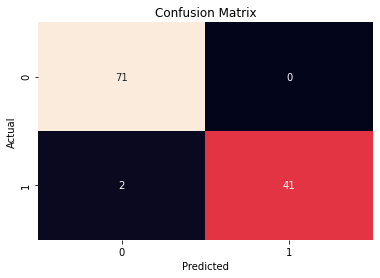

In [73]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

previsao2 = SVC1.predict(X_teste)

conf_mat = confusion_matrix(y_teste, previsao2)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [74]:
from sklearn.metrics import recall_score #recall

recall = recall_score(y_teste, previsao2)
print('Recall: ',recall)

Recall:  0.9534883720930233


In [75]:
from sklearn.metrics import f1_score #f1-score

f1 = f1_score(y_teste, previsao2)
print('F1-Score: %f' % f1)

F1-Score: 0.976190


In [76]:
from sklearn.metrics import classification_report # metricas de validação

print(classification_report(y_teste, previsao2))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [84]:
importances = clf1.feature_importances_
indices = np.argsort(importances)[::-1]
variable_importance = {'importance': importances, 'index': indices}
importances_modelo = variable_importance['importance']
indices_modelo = variable_importance['index']

In [85]:
names_index = x_teste.columns

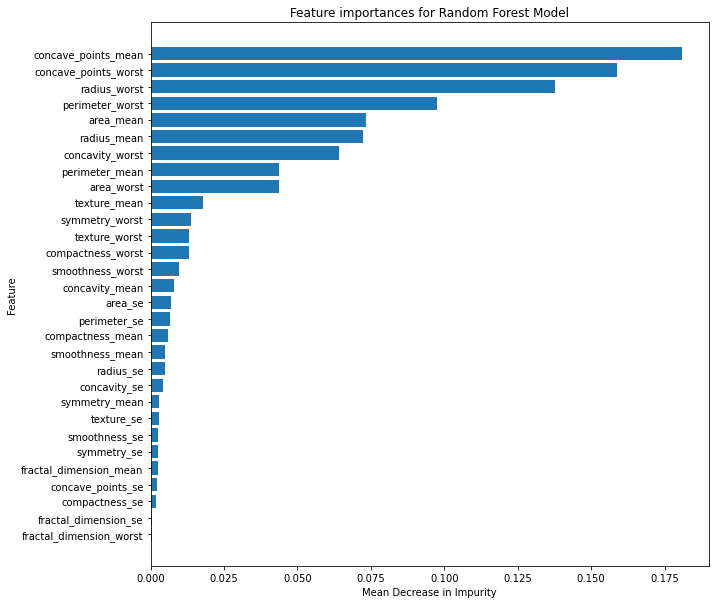

In [86]:
index = np.arange(len(names_index))
importance_desc = sorted(importances)
feature_space = []
for i in range(indices.shape[0] - 1, -1, -1):
    feature_space.append(names_index[indices[i]])
fig, ax = plt.subplots(figsize=(10, 10))
plt.title('Feature importances for Random Forest Model')
plt.barh(index,importance_desc,align="center")
plt.yticks(index,feature_space)
plt.xlabel('Mean Decrease in Impurity')
plt.ylabel('Feature')
plt.show()

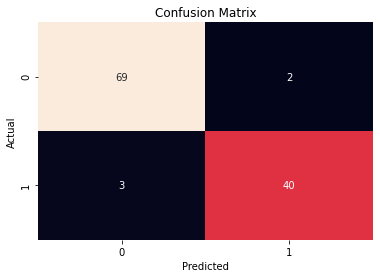

In [87]:
conf_mat = confusion_matrix(y_teste, previsao)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [90]:
modelo = ExtraTreesClassifier(n_estimators=200,max_depth=5)
modelo.fit(x_treino,y_treino)

ExtraTreesClassifier(max_depth=5, n_estimators=200)

In [92]:
previsao = modelo.predict(X_teste)
print('Acuracia : ',accuracy_score(y_teste, previsao))
print('Precisao : ',precision_score(y_teste, previsao, average='macro'))

Acuracia :  0.6929824561403509
Precisao :  0.7865384615384616


In [93]:
importances = modelo.feature_importances_
indices = np.argsort(importances)[::-1]
variable_importance = {'importance': importances,
            'index': indices}
importances_modelo = variable_importance['importance']
indices_modelo = variable_importance['index']

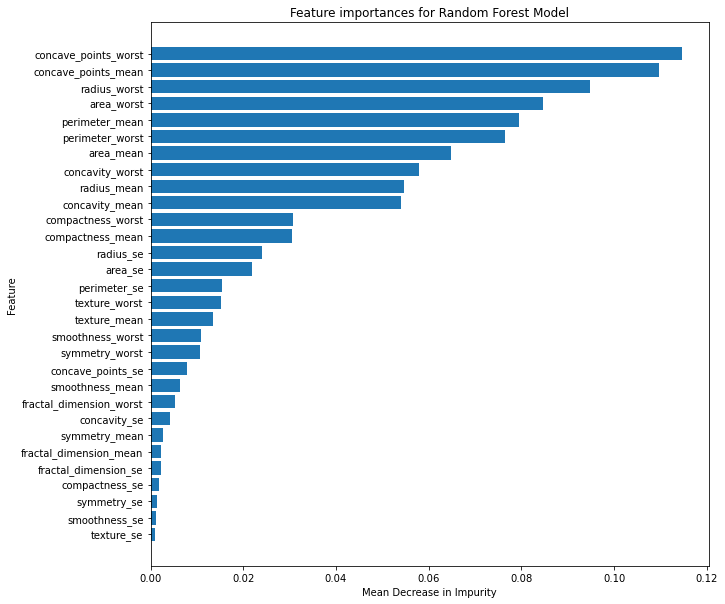

In [94]:
index = np.arange(len(names_index))
importance_desc = sorted(importances)
feature_space = []
for i in range(indices.shape[0] - 1, -1, -1):
    feature_space.append(names_index[indices[i]])
fig, ax = plt.subplots(figsize=(10, 10))
plt.title('Feature importances for Random Forest Model')
plt.barh(index,importance_desc,align="center")
plt.yticks(index,feature_space)
plt.xlabel('Mean Decrease in Impurity')
plt.ylabel('Feature')
plt.show()

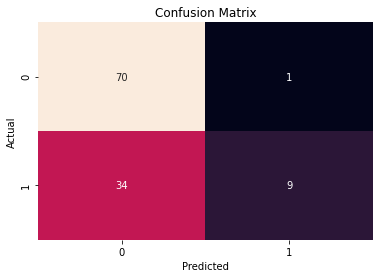

In [95]:
conf_mat = confusion_matrix(y_teste, previsao)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()